In [1]:
import pandas as pd
import numpy as np

from utils import load_parquet_to_df_list, z_normalize

### Load training data

In [2]:
path = "../../../../0_data/UCRArchive_2018/SwedishLeaf/train"
df_list_train = load_parquet_to_df_list(path)

X_train = pd.concat([df["signal"].to_frame() for df in df_list_train], axis=1)
X_train = z_normalize(X_train)

y_train = pd.concat([df["pattern_main_id"].to_frame() for df in df_list_train], axis=1).iloc[0, :]

In [3]:
df_list_train[0]

,pattern_main_id,signal
0,11,2.21493
1,11,2.05051
2,11,1.84235
3,11,1.63590
4,11,1.43259
...,...,...
123,11,1.33993
124,11,1.54185
125,11,1.75360
126,11,1.96243


In [4]:
X_train

,signal,signal,signal,signal,signal,signal,signal,signal,signal,signal,...,signal,signal,signal,signal,signal,signal,signal,signal,signal,signal
0,2.223633,1.879365,1.737821,1.849911,1.272420,1.855131,1.980311,1.256096,2.372685,1.757239,...,2.083123,1.895428,2.103342,1.105336,2.400193,1.561270,1.831127,2.017808,1.480454,2.029774
1,2.058567,1.733153,1.708888,1.756304,1.242152,1.699672,1.945595,1.177800,2.214034,1.623284,...,1.873362,1.724198,2.002517,0.874770,2.306958,1.396646,1.756485,1.900499,1.501426,1.937142
2,1.849589,1.579823,1.559112,1.599822,1.160121,1.447596,1.994798,1.032340,1.920566,1.469904,...,1.596348,1.560467,1.773882,0.711361,2.077942,1.031708,1.585476,1.717914,1.363446,1.747168
3,1.642328,1.402389,1.392660,1.426092,1.058091,1.250063,1.917555,0.878520,1.678298,1.317046,...,1.354441,1.409476,1.510552,0.666357,1.849518,0.750588,1.390242,1.498596,1.147401,1.588045
4,1.438219,1.257130,1.149077,1.273384,1.028827,1.098138,1.882779,0.893563,1.437475,1.163565,...,1.115365,1.220959,1.250514,0.498493,1.635240,0.427466,1.208922,1.317637,0.910140,1.434243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1.345195,1.162620,1.002372,1.193060,0.755275,1.037431,1.595726,0.942026,1.364450,1.123809,...,1.030905,1.450236,1.166254,0.534385,1.392409,0.394340,1.144440,1.204545,0.990679,1.285692
124,1.547908,1.314745,1.222534,1.343649,0.835097,1.199133,1.534958,0.956829,1.589209,1.274539,...,1.298884,1.506406,1.380864,0.653251,1.563047,0.703115,1.270413,1.377471,0.821239,1.452826
125,1.760490,1.500432,1.344060,1.516737,0.896891,1.402509,1.692896,1.077517,1.821819,1.428121,...,1.538491,1.654023,1.604449,0.715053,1.830966,1.022441,1.455076,1.591168,1.050893,1.625392
126,1.970141,1.657326,1.589952,1.672155,1.032240,1.634548,1.739579,1.112765,2.098101,1.582936,...,1.811339,1.727622,1.831709,0.871126,2.082068,1.330447,1.624659,1.772116,1.288864,1.822252


In [5]:
y_train

pattern_main_id    11
pattern_main_id    13
pattern_main_id     4
pattern_main_id    13
pattern_main_id     8
                   ..
pattern_main_id     9
pattern_main_id    12
pattern_main_id    11
pattern_main_id     4
pattern_main_id    13
Name: 0, Length: 499, dtype: int64

### Load test data

In [6]:
path = "../../../../0_data/UCRArchive_2018/SwedishLeaf/test"
df_list_test = load_parquet_to_df_list(path)

X_test = pd.concat([df["signal"].to_frame() for df in df_list_test], axis=1)
X_test = z_normalize(X_test)

y_test = pd.concat([df["pattern_main_id"].to_frame() for df in df_list_test], axis=1).T.iloc[:, 0]

### SAX variants

In [29]:
from discretization.sax.sax import SAX
from discretization.sax.one_d_sax import OneDSAX
from discretization.sax.adaptive_sax import AdaptiveSAX
from discretization.sax.extended_sax import ExtendedSAX
from discretization.persist.persist import Persist


window_size = 5
alphabet_size = 6
alphabet_size_slope = 8

sax = SAX(alphabet_size)
one_d_sax = OneDSAX(alphabet_size, alphabet_size_slope)
a_sax = AdaptiveSAX(alphabet_size)
e_sax = ExtendedSAX(alphabet_size)
persist = Persist(alphabet_size)

sax_variant = sax

### Symbol mapping strategies (for averages)

In [8]:
from discretization.symbol_mapping import IntervalNormMedian, IntervalMean, MeanValuePoints, MedianValuePoints


# standard normal distribution is stretched across y-axix, median of each interval is taken
# symbol_mapping = IntervalNormMedian(alphabet_size=sax_variant.alphabet_size)

# method to find a good lower bound
# symbol_mapping = IntervalMean(lower_bound=-1.5)

symbol_mapping = MeanValuePoints(X_train)

# symbol_mapping = MedianValuePoints(X_train)

### Symbol mapping strategies for slopes of 1d-SAX

In [9]:
from discretization.sax.one_d_sax import OneDSAX, compute_slopes


# need to compute slopes for both 'ValuePoints' symbol mapping strategies
df_slope = compute_slopes(X_train, window_size)

In [10]:
# lower_bound = df_slope.to_numpy().min()
# symbol_mapping_slope = IntervalMean(lower_bound)

# symbol_mapping_slope = MeanValuePoints(df_slope)

# symbol_mapping_slope = MedianValuePoints(df_slope)

# var_slope only available after it breakpoints_slope are set which needs window size to be known
one_d_sax.set_breakpoints_slope(window_size)
symbol_mapping_slope = IntervalNormMedian(alphabet_size=one_d_sax.alphabet_size_slope, var=one_d_sax.var_slope)

### Classification

### Classification evaluation metrics

In [11]:
from pattern_recognition.classification.eval_metrics import CLASSIFICATION_METRICS_MODULE
from utils import get_metric_instance


classification_metrics = ["Accuracy", "BalancedAccuracy", "F1", "Precision", "Recall", "JaccardSimilarityCoefficient"]

classification_metrics_lst = [get_metric_instance(CLASSIFICATION_METRICS_MODULE, metric) for metric in classification_metrics]

### Classifiers

In [12]:
from pattern_recognition.classification.classifiers import KNeighborsTimeSeriesClassifier, MLPTimeSeriesClassifier, DecisionTreeTimeSeriesClassifier
from pattern_recognition.graphics import plot_eval_metrics_comparison

In [13]:
neigh = KNeighborsTimeSeriesClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
score_raw = neigh.eval(X_test, y_test, classification_metrics_lst)

### First approach: Fit classifier with inverse transformed training data
1. Discretize training data as symbolic representation
2. Inverse transform discretized training data
3. Fit classifier with inverse transformed training data

In [14]:
neigh.fit_inverse_transformed(X_train, y_train, window_size, sax_variant, symbol_mapping=symbol_mapping)
score_inverse_transformed = neigh.eval(X_test, y_test, classification_metrics_lst)

### Second approach: Fit and evaluate classifier with discretized data
1. Discretize training and test data as symbolic representation
2. Encode symbolic representation for fitting and evaluation

In [15]:
from pattern_recognition.utils import get_linearized_encoded_sax


# Discretize test data
X_test_linearized_encoded, X_test_sax = get_linearized_encoded_sax(X_test, window_size, sax_variant)

In [16]:
neigh.fit_discretized_encoded(X_train, y_train, window_size, sax_variant)
score_linearized_encoded = neigh.eval(X_test_linearized_encoded, y_test, classification_metrics_lst)

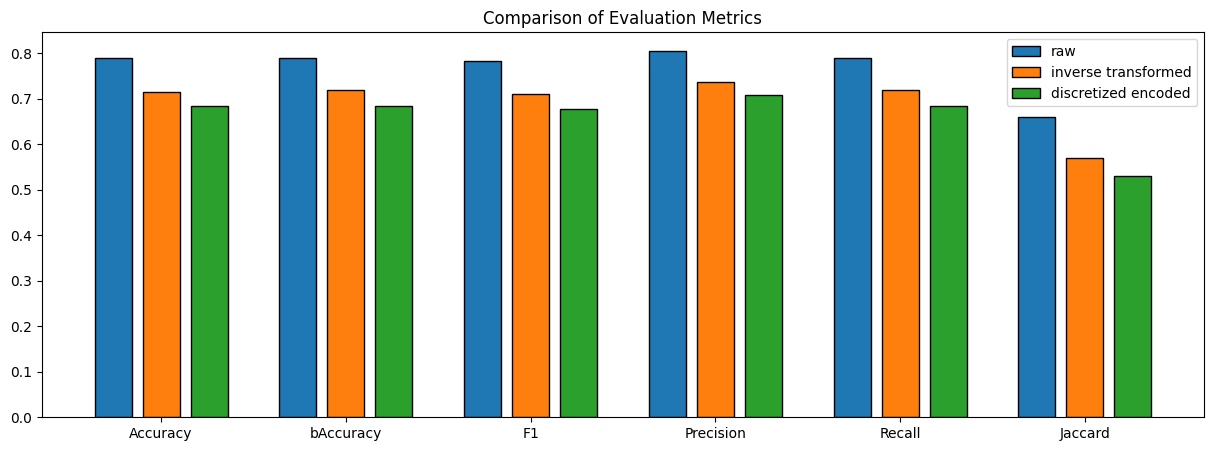

In [17]:
from pattern_recognition.graphics import plot_eval_metrics_comparison


plot_eval_metrics_comparison(score_raw, score_inverse_transformed, score_linearized_encoded)

### Clustering algorithms

### Ground truth clustering evaluation metrics

In [18]:
from pattern_recognition.clustering.eval_metrics import CLUSTERING_METRICS_MODULE
from utils import get_metric_instance


ground_truth_clustering_metrics = ["RandIndex", "AdjustedRandIndex", "MutualInformation", "AdjustedMutualInformation", "NormalizedMutualInformation", "Homogeneity",
                                   "Completeness", "VMeasure", "FowlkesMallowsIndex"]

ground_truth_clustering_metrics_lst = [get_metric_instance(CLUSTERING_METRICS_MODULE, metric) for metric in ground_truth_clustering_metrics]

### Internal clustering evaluation metrics (without ground truth)

In [19]:
internal_clustering_metrics = ["SilhouetteCoefficient", "CalinskiHarabaszIndex", "DaviesBouldinIndex"]

internal_clustering_metrics_lst = [get_metric_instance(CLUSTERING_METRICS_MODULE, metric) for metric in internal_clustering_metrics]

### Fit clustering with raw data

In [20]:
from pattern_recognition.clustering.clusterings import TimeSeriesKMeans, TimeSeriesBirch, TimeSeriesAffinityPropagation


kmeans = TimeSeriesKMeans(n_clusters=15, random_state=1)
kmeans.fit(X_train)
score_ground_truth_raw = kmeans.ground_truth_eval(y_train, ground_truth_clustering_metrics_lst)

### First approach: Fit clustering with inverse transformed training data
1. Discretize training data as symbolic representation
2. Inverse transform discretized training data

In [21]:
kmeans.fit_inverse_transformed(X_train, window_size, sax_variant, symbol_mapping=symbol_mapping)
score_ground_truth_inverse_transformed = kmeans.ground_truth_eval(y_train, ground_truth_clustering_metrics_lst)

### Second approach: Fit and evaluate clustering with discretized data
1. Discretize training and test data as symbolic representation
2. Encode symbolic representation for fitting and evaluation

In [22]:
kmeans.fit_discretized_encoded(X_train, window_size, sax_variant)
score_ground_truth_linearized_encoded = kmeans.ground_truth_eval(y_train, ground_truth_clustering_metrics_lst)

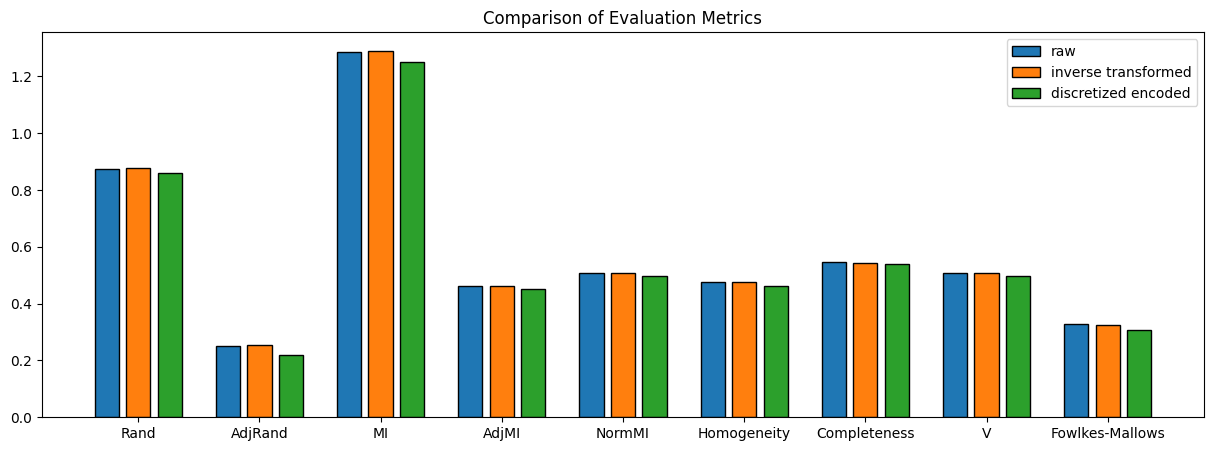

In [23]:
plot_eval_metrics_comparison(score_ground_truth_raw, score_ground_truth_inverse_transformed, score_ground_truth_linearized_encoded)

### Find best clustering for different number of clusters
Available for all available clustering algorithms with the three internal evaluation metrics mentioned above

In addition, ssq error available for k-means

In [27]:
ssq_error, silhouette, calinski_harabasz, davies_bouldin = [], [], [], []
for k in range(2,31):
    kmeans = TimeSeriesKMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_train)
    scores = kmeans.internal_eval(X_train, internal_clustering_metrics_lst)
    ssq_error.append(scores["SSQ-Error"])
    silhouette.append(scores["Silhouette"])
    calinski_harabasz.append(scores["Calinski-Harabasz"])
    davies_bouldin.append(scores["Davies-Bouldin"])

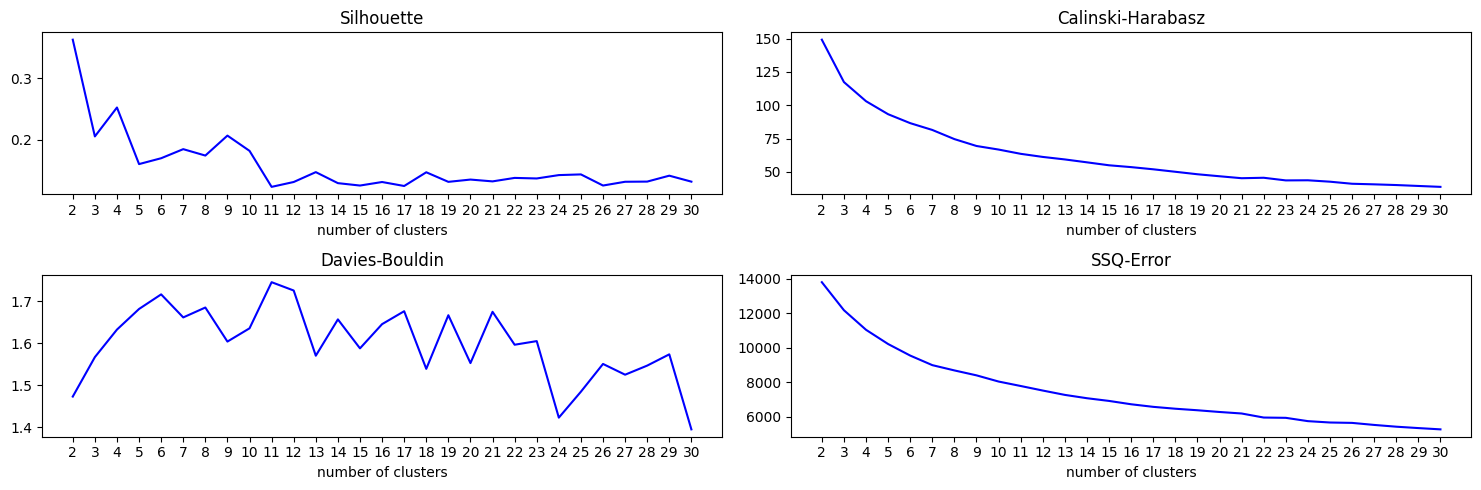

In [28]:
from graphics import plot_internal_clustering_metrics


plot_internal_clustering_metrics(np.array(silhouette), np.array(calinski_harabasz), np.array(davies_bouldin), 2, ssq_error)